In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | biggar
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | sandwick
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | gweru
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | yerbogachen
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | sergeyevka
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | kraski

Processing Record 40 of Set 4 | fare
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | raudeberg
Processing Record 43 of Set 4 | porto novo
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | mangrol
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | kulhudhuffushi
Processing Record 49 of Set 4 | udachnyy
Processing Record 50 of Set 4 | koyilandi
City not found. Skipping...
Processing Record 1 of Set 5 | biak
Processing Record 2 of Set 5 | westport
Processing Record 3 of Set 5 | chopinzinho
Processing Record 4 of Set 5 | hanzhong
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | fairbanks
Processing Record 7 of Set 5 | buenos aires
Processing Record 8 of Set 5 | bairiki
Processing Record 9 of Set 5 | amderma
City not found. Skipping...
Processing Record 10 of Set 5 | espanola
Processing Record 11 of Set 5 | longyearbyen
Processing Record 12 of S

Processing Record 26 of Set 8 | moron
Processing Record 27 of Set 8 | ntoum
Processing Record 28 of Set 8 | yushu
Processing Record 29 of Set 8 | matara
Processing Record 30 of Set 8 | zhanakorgan
Processing Record 31 of Set 8 | davila
Processing Record 32 of Set 8 | warwick
Processing Record 33 of Set 8 | le chambon-feugerolles
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | ribas do rio pardo
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | abu samrah
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | urulga
City not found. Skipping...
Processing Record 41 of Set 8 | simplicio mendes
Processing Record 42 of Set 8 | araouane
Processing Record 43 of Set 8 | port augusta
Processing Record 44 of Set 8 | koath
Processing Record 45 of Set 8 | hami
Processing Record 46 of Set 8 | pingliang
Processing Record 47 of Set 8 | duz
City not found. Skipping...
Processing Record 48 of Set 8 

Processing Record 10 of Set 12 | khonuu
City not found. Skipping...
Processing Record 11 of Set 12 | ahipara
Processing Record 12 of Set 12 | kipini
Processing Record 13 of Set 12 | ribeira brava
Processing Record 14 of Set 12 | karla
Processing Record 15 of Set 12 | swellendam
Processing Record 16 of Set 12 | tutoia
Processing Record 17 of Set 12 | alyangula
Processing Record 18 of Set 12 | saint-francois
Processing Record 19 of Set 12 | qixia
Processing Record 20 of Set 12 | puerto baquerizo moreno
Processing Record 21 of Set 12 | bundaberg
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | matagami
Processing Record 24 of Set 12 | mitsamiouli
Processing Record 25 of Set 12 | lata
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | dali
Processing Record 28 of Set 12 | colorado
Processing Record 29 of Set 12 | severo-kurilsk
Processing Record 30 of Set 12 | bemidji
Processing Record 31 of Set 12 | ellsworth
Processing Record 32 of Set 1

In [9]:
len(city_data)

574

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,31.39,89,100,3.33,GL,2021-05-31 14:40:28
1,Jamestown,42.0970,-79.2353,63.01,47,58,1.01,US,2021-05-31 14:40:13
2,Albany,42.6001,-73.9662,54.57,81,99,6.82,US,2021-05-31 14:36:50
3,Biggar,55.6167,-3.5167,69.30,55,2,10.58,GB,2021-05-31 14:40:29
4,Rikitea,-23.1203,-134.9692,74.08,66,0,13.47,PF,2021-05-31 14:40:29
5,Sandwick,60.0000,-1.2500,49.82,87,90,15.17,GB,2021-05-31 14:40:30
6,Kavaratti,10.5669,72.6420,83.77,76,21,22.48,IN,2021-05-31 14:40:30
7,Gweru,-19.4500,29.8167,67.82,29,98,3.09,ZW,2021-05-31 14:40:30
8,Kapaa,22.0752,-159.3190,71.58,88,20,4.41,US,2021-05-31 14:40:31
9,Thompson,55.7435,-97.8558,55.56,62,75,3.44,CA,2021-05-31 14:40:31


In [11]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-05-31 14:40:28,72.7868,-56.1549,31.39,89,100,3.33
1,Jamestown,US,2021-05-31 14:40:13,42.0970,-79.2353,63.01,47,58,1.01
2,Albany,US,2021-05-31 14:36:50,42.6001,-73.9662,54.57,81,99,6.82
3,Biggar,GB,2021-05-31 14:40:29,55.6167,-3.5167,69.30,55,2,10.58
4,Rikitea,PF,2021-05-31 14:40:29,-23.1203,-134.9692,74.08,66,0,13.47
5,Sandwick,GB,2021-05-31 14:40:30,60.0000,-1.2500,49.82,87,90,15.17
6,Kavaratti,IN,2021-05-31 14:40:30,10.5669,72.6420,83.77,76,21,22.48
7,Gweru,ZW,2021-05-31 14:40:30,-19.4500,29.8167,67.82,29,98,3.09
8,Kapaa,US,2021-05-31 14:40:31,22.0752,-159.3190,71.58,88,20,4.41
9,Thompson,CA,2021-05-31 14:40:31,55.7435,-97.8558,55.56,62,75,3.44


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
city_data_df = pd.read_csv("weather_data/cities.csv")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

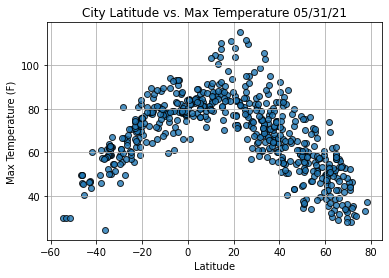

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

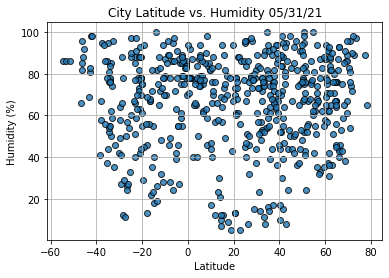

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

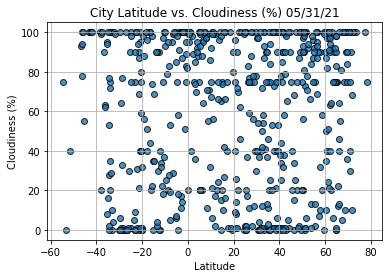

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

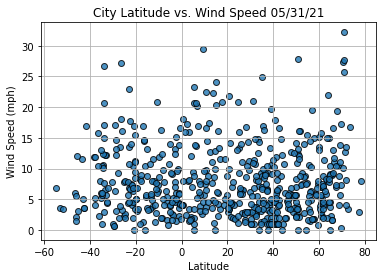

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    return r_value

In [20]:
index13 = city_data_df.loc[13]
index13


City_ID                        13
City                      Ushuaia
Country                        AR
Date          2021-05-31 14:40:33
Lat                         -54.8
Lng                         -68.3
Max Temp                    29.86
Humidity                       86
Cloudiness                     75
Wind Speed                   6.91
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Upernavik,GL,2021-05-31 14:40:28,72.7868,-56.1549,31.39,89,100,3.33
1,1,Jamestown,US,2021-05-31 14:40:13,42.0970,-79.2353,63.01,47,58,1.01
2,2,Albany,US,2021-05-31 14:36:50,42.6001,-73.9662,54.57,81,99,6.82
3,3,Biggar,GB,2021-05-31 14:40:29,55.6167,-3.5167,69.30,55,2,10.58
5,5,Sandwick,GB,2021-05-31 14:40:30,60.0000,-1.2500,49.82,87,90,15.17


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

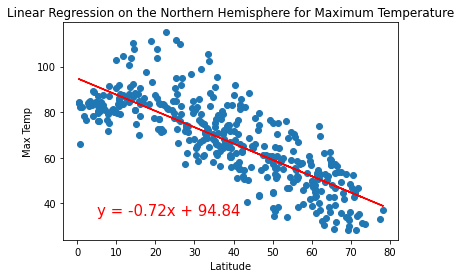

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,35))

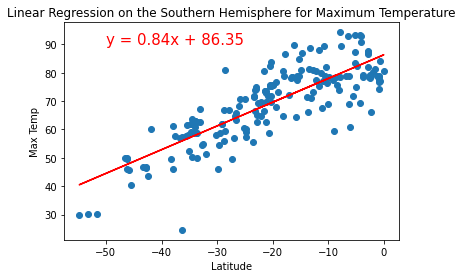

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

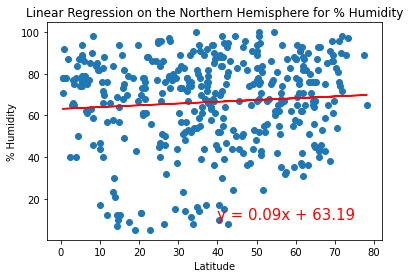

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

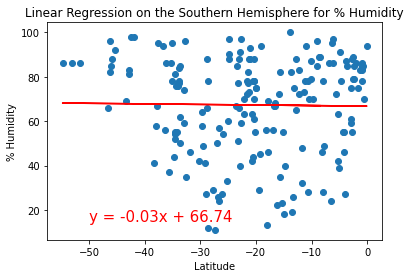

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

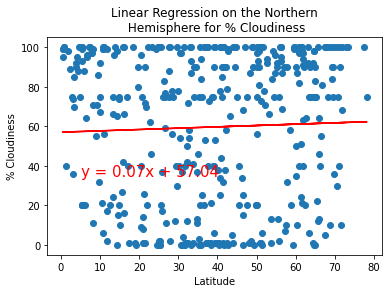

0.03622308867513001


In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
r_north = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern\n Hemisphere for % Cloudiness', '% Cloudiness',(5,35))
print(r_north)

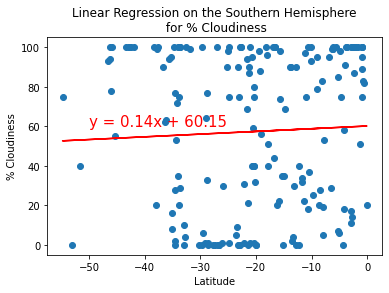

0.04549801159962523


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
r_south = plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\n for % Cloudiness", '% Cloudiness',(-50,60))
print(r_south)

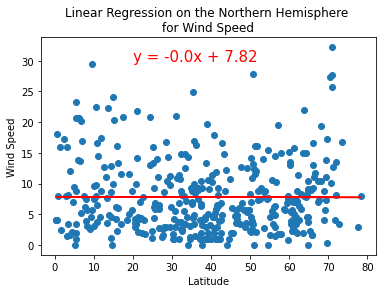

-0.003305274869348854

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(20,30))

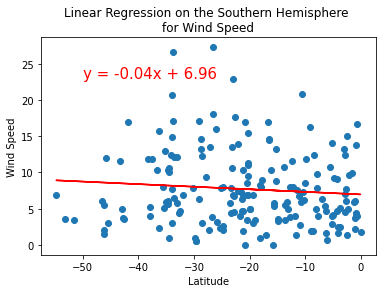

-0.08995823796644258

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,23))